### Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

#### Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.

In [1]:
# Imports
import pandas as pd
import plotly.graph_objects as go

from IPython.display import Image

In [2]:
# Load cases, deaths, and county population data
dataFileCases = '../../Team/covid_confirmed_usafacts.csv'
dataFileDeaths = '../../Team/covid_deaths_usafacts.csv'
dataFilePopulation = '../../Team/covid_county_population_usafacts.csv'

dfCases = pd.read_csv(dataFileCases)
dfDeaths = pd.read_csv(dataFileDeaths)
dfPopulation = pd.read_csv(dataFilePopulation)

In [3]:
# Get only the entries relating to the state of Georgia
dfCasesGA = dfCases.loc[dfCases['State'] == 'GA']

In [4]:
# Select case data on a weekly basis (Wednesday from each week)
# July 1, 2020 is a Wednesday
count = 2
weeklyCasesGA = [] # where Wednesday from each week is chosen
for col in dfCasesGA.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesGA.append(dfCasesGA[col].sum())
dfWeeklyCasesGA = pd.Series(weeklyCasesGA)
dfWeeklyCasesGA.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

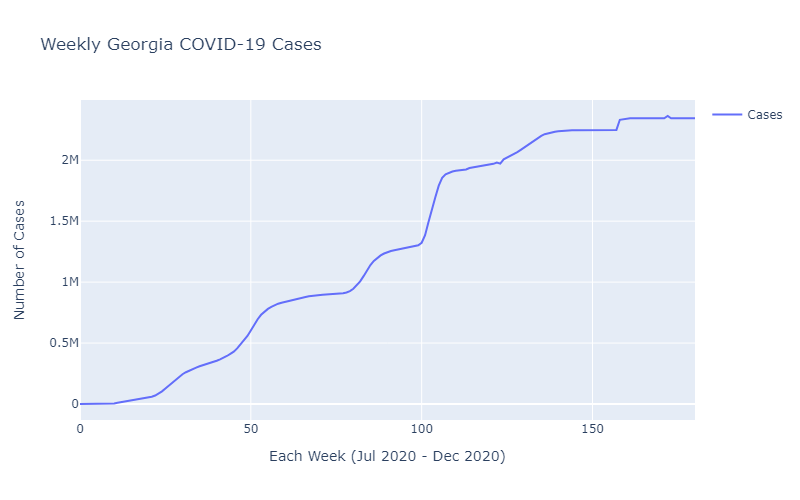

In [5]:
# Graph case data
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfWeeklyCasesGA.index, y=dfWeeklyCasesGA,
                         mode='lines', name='Cases'))
fig.update_layout(
    title='Weekly Georgia COVID-19 Cases',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='Number of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("ga_cases.png")
Image(filename="ga_cases.png")

#### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.

In [6]:
# TODO: Modality

# Calculate center, variance, skewness and kurtosis
center = dfWeeklyCasesGA.mean()
variance = dfWeeklyCasesGA.var()
skewness = dfWeeklyCasesGA.skew()
kurtosis = dfWeeklyCasesGA.kurt()

print("Center: ", center)
print("Variance: ", variance)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)

Center:  1272866.8011049724
Variance:  730072823508.8269
Skewness:  -0.11243405504267552
Kurtosis:  -1.5154354953747438


#### Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

In [7]:
# [1] Case data for Florida (FL)
dfCasesFL = dfCases.loc[dfCases['State'] == 'FL']

# [2] Case data for Michigan (MI)
dfCasesMI = dfCases.loc[dfCases['State'] == 'MI']

# [3] Case data for North Carolina (NC)
dfCasesNC = dfCases.loc[dfCases['State'] == 'NC']

# [4] Case data for New Jersey (NJ)
dfCasesNJ = dfCases.loc[dfCases['State'] == 'NJ']

# [5] Case data for Texas (TX)
dfCasesTX = dfCases.loc[dfCases['State'] == 'TX']

In [8]:
# Gather weekly Florida cases
count = 2
weeklyCasesFL = []
for col in dfCasesFL.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesFL.append(dfCasesFL[col].sum())
dfWeeklyCasesFL = pd.Series(weeklyCasesFL)
dfWeeklyCasesFL.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
# Gather weekly Michigan cases
count = 2
weeklyCasesMI = []
for col in dfCasesMI.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesMI.append(dfCasesMI[col].sum())
dfWeeklyCasesMI = pd.Series(weeklyCasesMI)
dfWeeklyCasesMI.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
# Gather weekly North Carolina cases
count = 2
weeklyCasesNC = []
for col in dfCasesNC.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesNC.append(dfCasesNC[col].sum())
dfWeeklyCasesNC = pd.Series(weeklyCasesGA)
dfWeeklyCasesNC.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [11]:
# Gather weekly New Jersey cases
count = 2
weeklyCasesNJ = []
for col in dfCasesNJ.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesNJ.append(dfCasesNJ[col].sum())
dfWeeklyCasesNJ = pd.Series(weeklyCasesNJ)
dfWeeklyCasesNJ.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [12]:
# Gather weekly Texas cases
count = 2
weeklyCasesTX = []
for col in dfCasesTX.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyCasesTX.append(dfCasesTX[col].sum())
dfWeeklyCasesTX = pd.Series(weeklyCasesTX)
dfWeeklyCasesTX.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

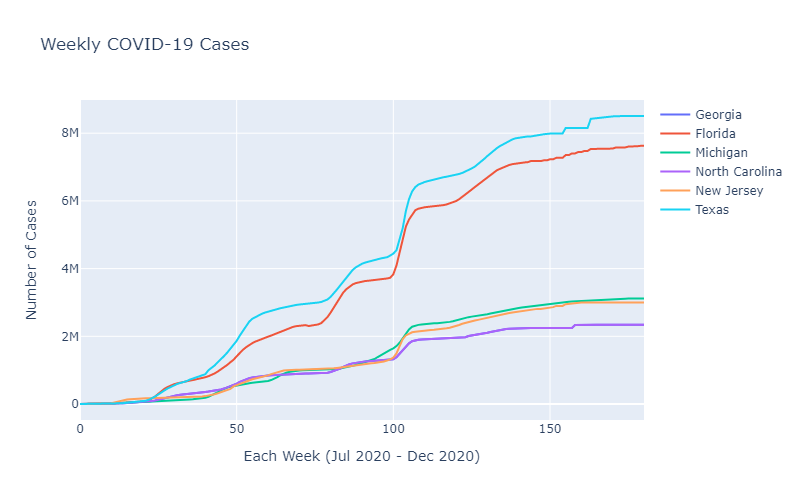

In [13]:
# Graph all state case data
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfWeeklyCasesGA.index, y=dfWeeklyCasesGA,
                         mode='lines', name='Georgia'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesFL.index, y=dfWeeklyCasesFL,
                         mode='lines', name='Florida'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesMI.index, y=dfWeeklyCasesMI,
                         mode='lines', name='Michigan'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNC.index, y=dfWeeklyCasesNC,
                         mode='lines', name='North Carolina'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesNJ.index, y=dfWeeklyCasesNJ,
                         mode='lines', name='New Jersey'))
fig.add_trace(go.Scatter(x=dfWeeklyCasesTX.index, y=dfWeeklyCasesTX,
                         mode='lines', name='Texas'))
fig.update_layout(
    title='Weekly COVID-19 Cases',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='Number of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("all_cases.png")
Image(filename="all_cases.png")

<span style="color:red">**The distribution of Georgia and Florida is different compared to Georgia.**</span>

### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did. (25 points)

In [14]:
# [1] Death data for Georgia (GA)
dfDeathsGA = dfDeaths.loc[dfDeaths['State'] == 'FL']

# [2] Death data for Florida (FL)
dfDeathsFL = dfDeaths.loc[dfDeaths['State'] == 'FL']

# [3] Death data for Michigan (MI)
dfDeathsMI = dfDeaths.loc[dfDeaths['State'] == 'MI']

# [4] Death data for North Carolina (NC)
dfDeathsNC = dfDeaths.loc[dfDeaths['State'] == 'NC']

# [5] Death data for New Jersey (NJ)
dfDeathsNJ = dfDeaths.loc[dfDeaths['State'] == 'NJ']

# [6] Death data for Texas (TX)
dfDeathsTX = dfDeaths.loc[dfDeaths['State'] == 'TX']

In [15]:
# Gather weekly Georgia Deaths
count = 2
weeklyDeathsGA = []
for col in dfDeathsGA.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsGA.append(dfDeathsGA[col].sum())
dfWeeklyDeathsGA = pd.Series(weeklyDeathsGA)
dfWeeklyDeathsGA.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [16]:
# Gather weekly Florida Deaths
count = 2
weeklyDeathsFL = []
for col in dfDeathsFL.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsFL.append(dfDeathsFL[col].sum())
dfWeeklyDeathsFL = pd.Series(weeklyDeathsFL)
dfWeeklyDeathsFL.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [17]:
# Gather weekly Michigan Deaths
count = 2
weeklyDeathsMI = []
for col in dfDeathsMI.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsMI.append(dfDeathsMI[col].sum())
dfWeeklyDeathsMI = pd.Series(weeklyDeathsMI)
dfWeeklyDeathsMI.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [18]:
# Gather weekly North Carolina Deaths
count = 2
weeklyDeathsNC = []
for col in dfDeathsNC.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsNC.append(dfDeathsNC[col].sum())
dfWeeklyDeathsNC = pd.Series(weeklyDeathsNC)
dfWeeklyDeathsNC.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [19]:
# Gather weekly New Jersey Deaths
count = 2
weeklyDeathsNJ = []
for col in dfDeathsNJ.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsNJ.append(dfDeathsNJ[col].sum())
dfWeeklyDeathsNJ = pd.Series(weeklyDeathsNJ)
dfWeeklyDeathsNJ.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [20]:
# Gather weekly Texas Deaths
count = 2
weeklyDeathsTX = []
for col in dfDeathsTX.columns:
    count = count + 1
    if count % 7 == 0:
        weeklyDeathsTX.append(dfDeathsTX[col].sum())
dfWeeklyDeathsTX = pd.Series(weeklyDeathsTX)
dfWeeklyDeathsTX.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [21]:
# TODO: Graph Poisson distribution of COVID-19 Cases

In [22]:
# TODO: Graph Poisson distribution of COVID-19 Deaths

### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)

### Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)